# Projeto: Previsão de Renda - versão 2

## Entendimento dos dados


### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente e uma coluna para cada variável armazenando as características desses clientes:


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência	texto                           | texto        |
| id_cliente              |  Código cliente                                     | inteiro      |
| sexo                    |  sexo                                               | M/F          |
| posse_de_veiculo        |  Possui veículo                                     | Y/N          |
| posse_de_imovel         |  POssui imóvel                                      | Y/N          |
| qtd_filhos              |  Quantidade de filhos                               | inteiro      |
| tipo_renda              |  Tipo de renda                                      | texto        |
| educacao                |  Escolariadade                                      | texto        |
| estado_civil            |  Estado civil                                       | texto        |
| tipo_residencia         |  Tipo de residência                                 | texto        |
| idade                   |  Idade (anos)                                       | inteiro      |
| tempo_emprego           |  Tempo de emprego                                   | float        |
| qt_pessoas_residencia   |  Quantidade de pessoas na residência                | float        |
| renda                   |  Renda                                              | float        |





Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelo de previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.color_palette("hls", 8)

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [2]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
print ("Número de linhas: {} e colunas: {} da tabela".format(df.shape[0], df.shape[1]))

Número de linhas: 15000 e colunas: 16 da tabela


In [4]:
df['data_ref'] = pd.to_datetime(df['data_ref']) # para datetime
df.drop(columns=['Unnamed: 0'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_ref               15000 non-null  datetime64[ns]
 1   index                  15000 non-null  int64         
 2   sexo                   15000 non-null  object        
 3   posse_de_veiculo       15000 non-null  bool          
 4   posse_de_imovel        15000 non-null  bool          
 5   qtd_filhos             15000 non-null  int64         
 6   tipo_renda             15000 non-null  object        
 7   educacao               15000 non-null  object        
 8   estado_civil           15000 non-null  object        
 9   tipo_residencia        15000 non-null  object        
 10  idade                  15000 non-null  int64         
 11  tempo_emprego          12466 non-null  float64       
 12  qt_pessoas_residencia  15000 non-null  float64       
 13  m

## Verificando as suposições do modelo

Seguindo o modelo utilizado na versão 1

In [5]:
# preenchendo dados faltantes
df.tempo_emprego.fillna(df.tempo_emprego.mean(), inplace = True)

# Criando as variáveis log_renda
df['log_renda'] = np.log(df['renda'])

# dummizando variáveis categóricas
df2 = df[['data_ref','sexo', 'posse_de_imovel', 'qtd_filhos', 'idade', 
          'tempo_emprego', 'qt_pessoas_residencia', 'tipo_renda',
          'renda', 'log_renda']].copy()
df_dummies = pd.get_dummies(df2, columns=['data_ref', 'sexo', 'posse_de_imovel', 'tipo_renda'], drop_first = True)

# separando variável resposta
X = df_dummies.drop(['log_renda', "renda"], axis=1).copy()
y = df_dummies['log_renda']

# base de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

In [6]:
# modelo
md3 = sm.OLS(y_train, sm.add_constant(X_train))
ri3 = md3.fit_regularized(method = 'elastic_net' ,
                             refit = True,
                             L1_wt = 0.1,
                             alpha = 0.01)
print(ri3.summary())

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     294.7
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:06:43   Log-Likelihood:                -12005.
No. Observations:               11250   AIC:                         2.403e+04
Df Residuals:                   11239   BIC:                         2.412e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?

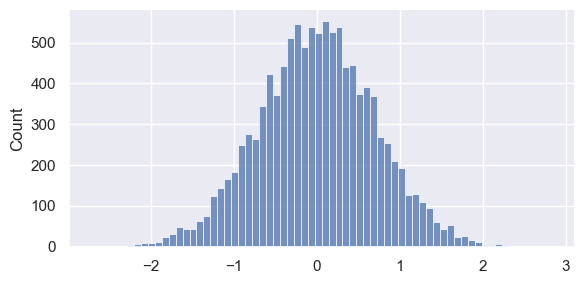

In [7]:
sns.set_theme()
sns.displot(ri3.resid, height=3, aspect=2)
plt.show()

Resíduos tem distribuição próxima da normal


- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos


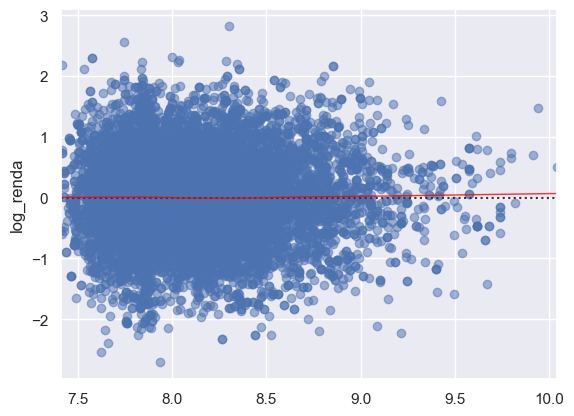

In [8]:
sns.residplot(x=ri3.predict(), y=y_train, data=df_dummies, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});

- Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    

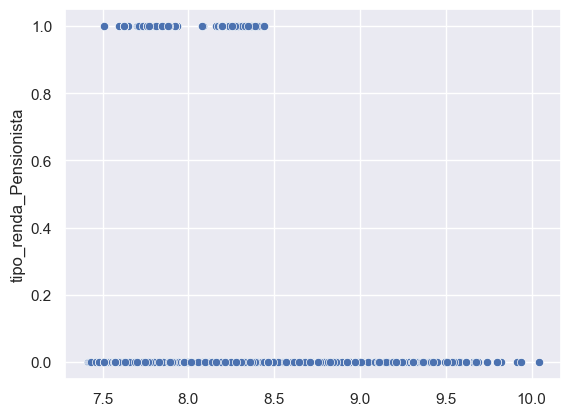

In [9]:
sns.scatterplot(x = ri3.predict(), y = 'tipo_renda_Pensionista', data=X_train);
plt.show()

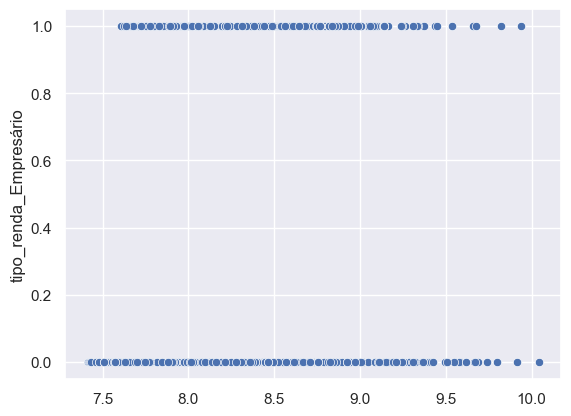

In [10]:
sns.scatterplot(x = ri3.predict(), y = 'tipo_renda_Empresário', data=X_train);
plt.show()

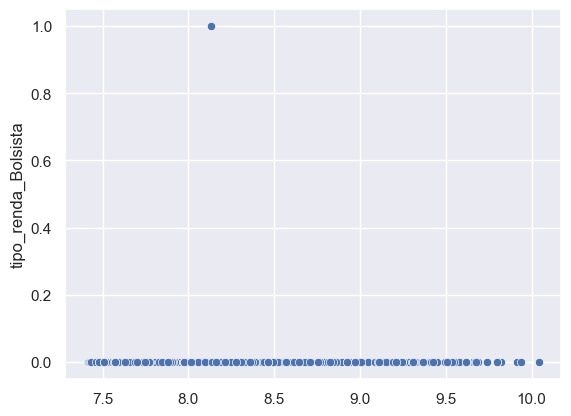

In [11]:
sns.scatterplot(x = ri3.predict(), y = 'tipo_renda_Bolsista', data=X_train);
plt.show()

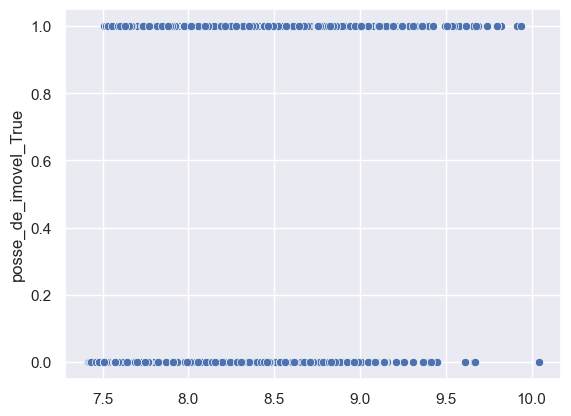

In [12]:
sns.scatterplot(x = ri3.predict(), y = 'posse_de_imovel_True', data=X_train);
plt.show()

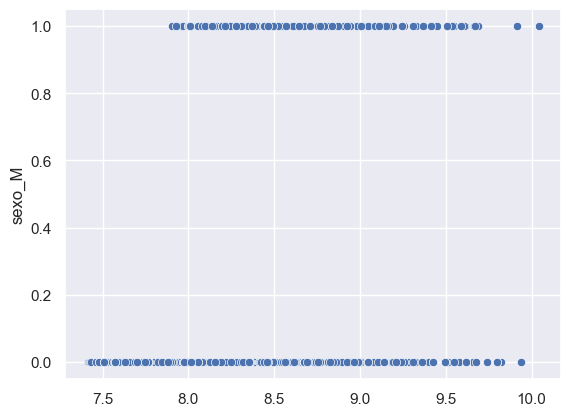

In [13]:
sns.scatterplot(x = ri3.predict(), y = 'sexo_M', data=X_train);
plt.show()

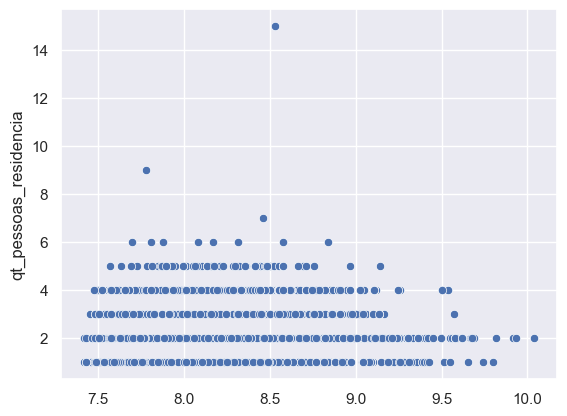

In [14]:
sns.scatterplot(x = ri3.predict(), y = 'qt_pessoas_residencia', data=X_train);
plt.show()

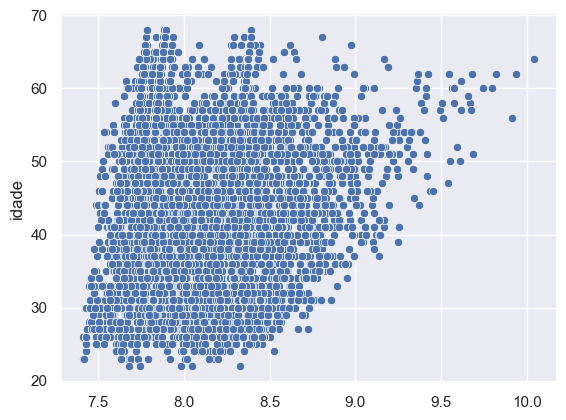

In [15]:
sns.scatterplot(x = ri3.predict(), y = 'idade', data=X_train);
plt.show()

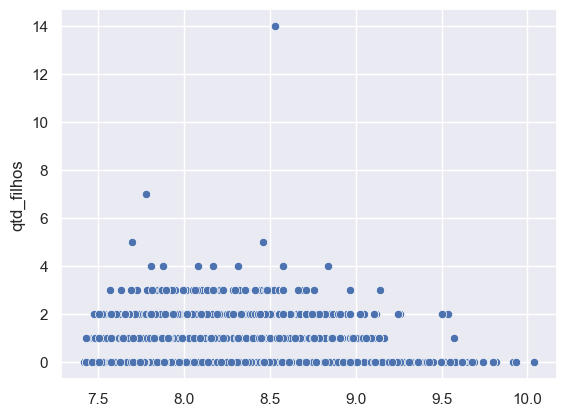

In [16]:
sns.scatterplot(x = ri3.predict(), y = 'qtd_filhos', data=X_train);
plt.show()

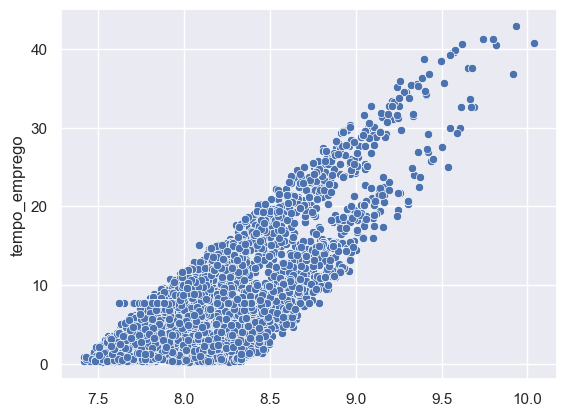

In [17]:
sns.scatterplot(x = ri3.predict(), y = 'tempo_emprego', data=X_train);
plt.show()

- Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência e se a variância da variável resposta parece ser conforme os valores previstos

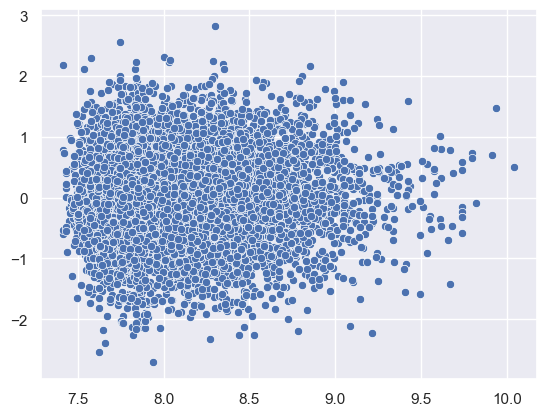

In [18]:
sns.scatterplot(x = ri3.predict(), y = ri3.resid)
plt.show()

- Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência

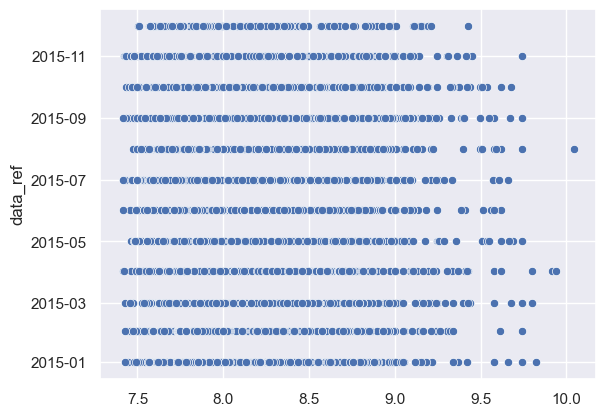

In [19]:
sns.scatterplot(x = ri3.predict(), y = 'data_ref', data=df[:11250]);
plt.show()

A distribuição dos resíduos do modelo é bastante uniforme.

## Outliers

Atavés dos *studentized residuals*, verifique se há pontos que parecem ser discrepantes.


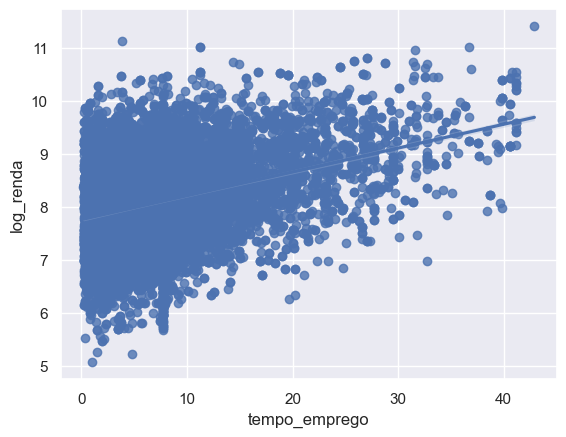

In [20]:
fig, ax = plt.subplots()

sns.regplot(x = 'tempo_emprego', y = 'log_renda', data=df_dummies, ax=ax);

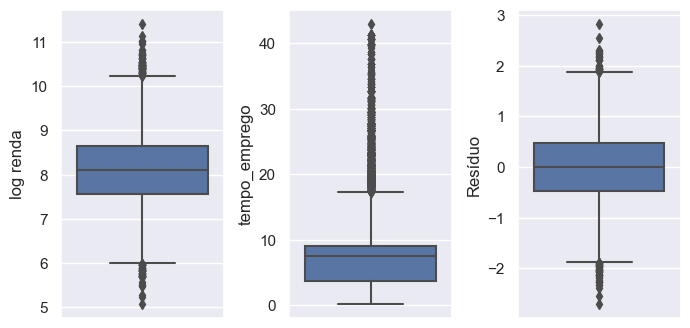

In [21]:
fix, ax = plt.subplots(1, 3, figsize=(8,4))
plt.subplots_adjust(wspace=.4, hspace=0)

sns.boxplot(y = 'log_renda',data=df_dummies, ax=ax[0])
sns.boxplot(y = 'tempo_emprego',data=df_dummies, ax=ax[1])
sns.boxplot(y = ri3.resid ,data=df_dummies, ax=ax[2]);

ax[0].set_ylabel('log renda')
ax[2].set_ylabel('tempo_emprego')
ax[2].set_ylabel('Resíduo');

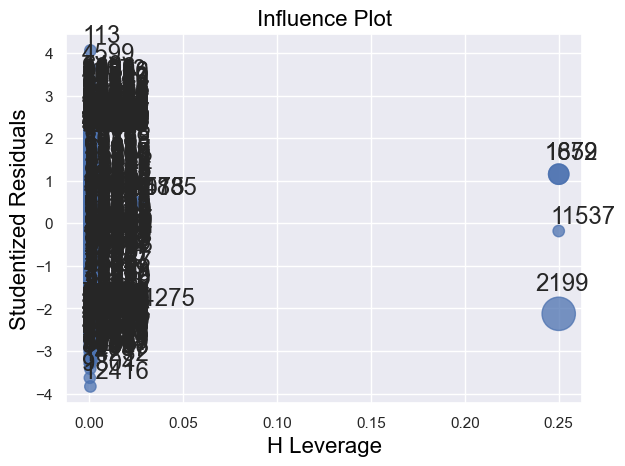

In [22]:
ri3_smf = smf.ols('log_renda ~ C(sexo) + C(posse_de_imovel) + qtd_filhos + idade + tempo_emprego + qt_pessoas_residencia + C(tipo_renda)', data=df2).fit()

fig = sm.graphics.influence_plot(ri3_smf, criterion="cooks", size = 24)
fig.tight_layout(pad=1.0)

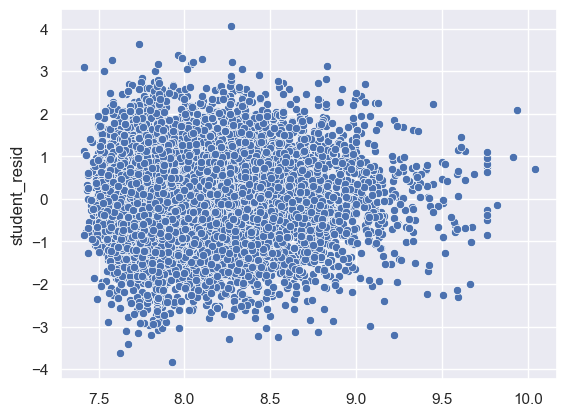

In [23]:
st_res = ri3_smf.outlier_test()
sns.scatterplot(x = ri3_smf.predict(), y = st_res.student_resid);

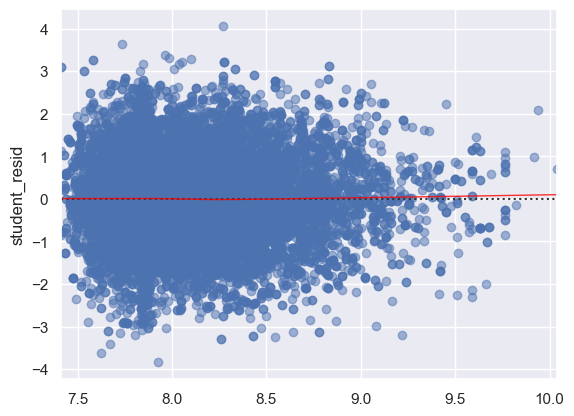

In [24]:
sns.residplot(x=ri3_smf.predict(), y=st_res.student_resid, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});

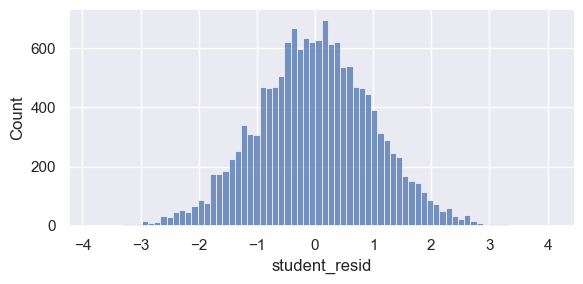

In [25]:
sns.displot(st_res.student_resid, height=3, aspect=2);

O padrão dos resíduos no gráfico apresenta uma distribuição uniforme, enquanto a análise do boxplot revela a presença de valores discrepantes, porém, não há indícios de que esses valores atípicos estejam afetando significativamente os dados.

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman


In [26]:
df2.corr()

C:\Users\Artur\AppData\Local\Temp\ipykernel_20508\1778878097.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
posse_de_imovel,1.000000,-0.002525,0.122667,0.000104,-0.007180,0.029827,0.045297
qtd_filhos,-0.002525,1.000000,-0.364303,-0.071583,0.896488,0.009567,0.023743
idade,0.122667,-0.364303,1.000000,0.246217,-0.338805,0.042570,0.024712
tempo_emprego,0.000104,-0.071583,0.246217,1.000000,-0.062089,0.378387,0.347757
qt_pessoas_residencia,-0.007180,0.896488,-0.338805,-0.062089,1.000000,0.020977,0.036267
renda,0.029827,0.009567,0.042570,0.378387,0.020977,1.000000,0.835734
log_renda,0.045297,0.023743,0.024712,0.347757,0.036267,0.835734,1.000000


In [27]:
df2.corr(method='spearman')

C:\Users\Artur\AppData\Local\Temp\ipykernel_20508\4030477065.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr(method='spearman')


,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
posse_de_imovel,1.000000,-0.008578,0.120780,0.006181,-0.011885,0.043893,0.043893
qtd_filhos,-0.008578,1.000000,-0.416238,-0.085255,0.833497,0.018905,0.018905
idade,0.120780,-0.416238,1.000000,0.293823,-0.349957,0.024496,0.024496
tempo_emprego,0.006181,-0.085255,0.293823,1.000000,-0.053055,0.268713,0.268713
qt_pessoas_residencia,-0.011885,0.833497,-0.349957,-0.053055,1.000000,0.036609,0.036609
renda,0.043893,0.018905,0.024496,0.268713,0.036609,1.000000,1.000000
log_renda,0.043893,0.018905,0.024496,0.268713,0.036609,1.000000,1.000000


- VIF

In [28]:
# VIF
variaveis = ['tempo_emprego', 'posse_de_imovel','log_renda']

dummy = pd.get_dummies(df2[variaveis], drop_first=True)
dummy.head(2)

,tempo_emprego,posse_de_imovel,log_renda
0,3.575342,True,8.122442
1,0.860274,True,8.715411


In [29]:
mapa = {True: 1, False: 0}
dummy['posse_de_imovel'] = dummy['posse_de_imovel'].map(mapa)
vif(dummy.values,1)

3.0333027156944454

In [30]:
vars_vif = pd.DataFrame()
vars_vif["VIF Factor"] = [vif(dummy, i) for i in range(dummy.shape[1])]
vars_vif["Feature"] = dummy.columns

vars_vif.round(2)

,VIF Factor,Feature
0,2.77,tempo_emprego
1,3.03,posse_de_imovel
2,4.95,log_renda


## Ajustes

Aparentemente que os ajustes realizados pela regressão LASSO foram suficientes para otimizar o modelo, portanto não há necessidade de efetuar mais ajustes.